## 1.  Explain dimension reduction in machine learning

#### Dimensionality reduction is a part of preprocessing in machine learning. It usually done before building a predictive model.In dimensionality reduction we reduce the dimension of the input variables present in the dataset.Large number of input variables may affect the performance of the model with complex structure, and it reduces the chance of getting a generalized model, such situations sometimes referred to as the curse of dimensionality. There are different methods exist for dimensionality reduction.
#### Feature Elimination- we reduce the feature space by eliminating features.
#### Feature Extraction- we extract the features into new defined features. In this method we are not losing much information.
#### Wrapper and filter method are examples of feature extraction.In wrapper method we try models with different subsets of the input features and select the one which give the best result.In filter method we select feature by measuring how the input variable related to the target variable for this we can use different statistical tests.Another most common method is PCA (Principal Component Analysis).It is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.After doing PCA we get a projection of our original dataset.
#### Here i demonstrated PCA.

In [2]:
# importing library and reading data
import pandas as pd
hr_data=pd.read_csv("HR.csv")

In [4]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
hr_data.shape

(14999, 10)

In [11]:
hr_data[hr_data.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
hr_data1=hr_data.drop_duplicates()

In [14]:
hr_data1.shape

(11991, 10)

##### For the time being we does not do pre processing or data analysis. 

In [15]:
hr_data1=pd.get_dummies(hr_data1)

In [16]:
hr_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
hr_data1.shape

(11991, 21)

In [20]:
X=hr_data1.drop('left',axis=1).values
y=hr_data1['left'].values

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

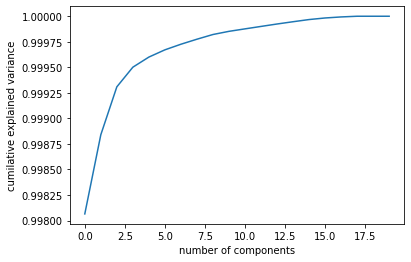

In [29]:
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumilative explained variance");

In [30]:
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X)

In [33]:
X_pca.shape

(11991, 10)

## 2. How can you handle duplicate values in a dataset for a variable in Python using pandas?

#### we already imported pandas, now let's read the file

In [ ]:
df=pd.read_csv("file.csv")
df[df.duplicated(keep=False)] #can be used to display duplicates
# to drop duplicates based on a variable
df=df.drop_duplicates(subset=['column_name'])
# we can use parameter keep= first or last
df=df.drop_duplicates(subset=['column_name'],keep='first')
df=df.drop_duplicates(subset=['column_name'],keep='last')

df=df.drop_duplicates() # for droping duplicate rows
# also we can use parameters like inplace,keep,ignore_index if needed